## Dataset Reading and Visulization

In [2]:
from mlxtend.data import loadlocal_mnist # library to load ubyte files
import matplotlib.pyplot as plt
import numpy as np
import time

In [3]:
# loading train and test dataset
X_train, y_train = loadlocal_mnist(images_path='Dataset/train-images.idx3-ubyte',labels_path='Dataset/train-labels.idx1-ubyte')
X_test, y_test = loadlocal_mnist(images_path='Dataset/t10k-images.idx3-ubyte',labels_path='Dataset/t10k-labels.idx1-ubyte')

Mnist Handwritten dataset consists of 60000 training images of digits and 10000 testing images. The dataset consists of 28*28 gray scale images.

In [4]:
print('Training Dataset shape:',X_train.shape)
print('Training labels shape:',y_train.shape)

print('Testing Dataset shape:',X_test.shape)
print('Testing labels shape:',y_test.shape)

print('Unique Labels:',np.unique(y_train))

Training Dataset shape: (60000, 784)
Training labels shape: (60000,)
Testing Dataset shape: (10000, 784)
Testing labels shape: (10000,)
Unique Labels: [0 1 2 3 4 5 6 7 8 9]


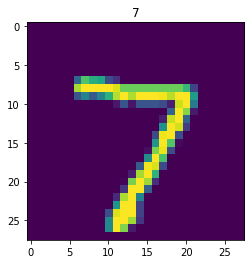

In [5]:
# Visulizing Dataset one example.
plt.imshow(X_test[0].reshape(28,28))
plt.title(y_test[0]);

Visualizing first 40 images from training dataset and their labels. Its shows some examples of style of each digit written by hand.

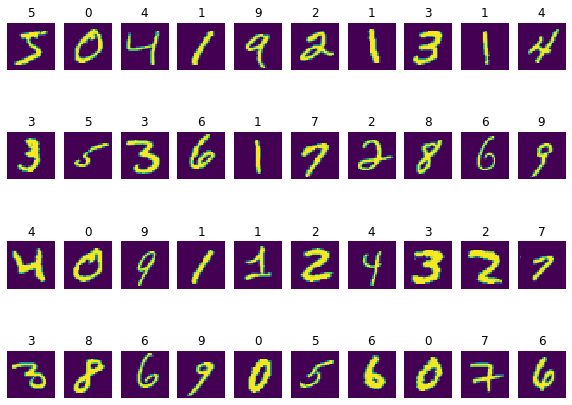

In [6]:
plt.figure(figsize=(10,80))
for i in range (0,40):
    plt.subplot(40,10,i+1)
    img1=X_train[i].reshape(28,28)
    plt.imshow(img1)
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

## Data Preprocessing:

### 1. Histogram-Of-Oriented-Gradients (HOG)

HOG decomposes an image into small squared cells, computes an histogram of oriented gradients in each cell, normalizes the result using a block-wise pattern, and return a descriptor for each cell. We choose [7,7] size of cell so that we can preserve the shape information. HOG generates 144 features array. The output of one image HOG is shown below:

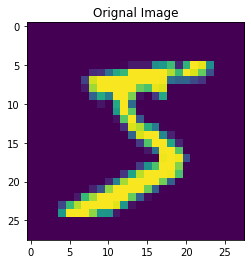

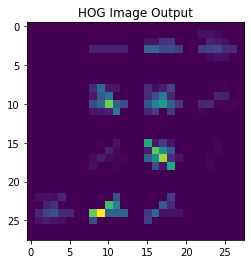

HOG extracted featues shape: (144,)


In [7]:
from skimage.feature import hog
fd,hog_img = hog(X_train[0].reshape(28,28), orientations=9, pixels_per_cell=(7,7),cells_per_block=(1,1),visualize=True)
plt.imshow(X_train[0].reshape(28,28));
plt.title('Orignal Image')
plt.show()
plt.imshow(hog_img);
plt.title('HOG Image Output');
plt.show()
print('HOG extracted featues shape:',fd.shape)

Transfering all images and saving the features in X_train_hog and X_test_hog.

In [8]:
X_train_hog=np.zeros((X_train.shape[0],fd.shape[0])) #initlization of zeros numpy array of features shape.
for i in range(len(X_train)):
    X_train_hog[i] = hog(X_train[i].reshape(28,28), orientations=9, pixels_per_cell=(7,7),cells_per_block=(1,1),visualize=False)
print('HOG Training shape:',X_train_hog.shape)

HOG Training shape: (60000, 144)


In [9]:
X_test_hog=np.zeros((X_test.shape[0],fd.shape[0])) #initlization of zeros numpy array of features shape.
for i in range(len(X_test)):
    X_test_hog[i] = hog(X_test[i].reshape(28,28), orientations=9, pixels_per_cell=(7,7),cells_per_block=(1,1),visualize=False)
print('HOG Testing shape:',X_test_hog.shape)

HOG Testing shape: (10000, 144)


### 2. Local Binary Pattern (LBP)

Local Binary pattern is a method in which pixels values are changed based on their neighborhood pixels. We have chosen 3 radius and 8 neighbors of lbp. The algorithm work based on sliding window concepts of parameters radius and neighbors and place the middle pixels value.

LBP extracted image shape: (28, 28)


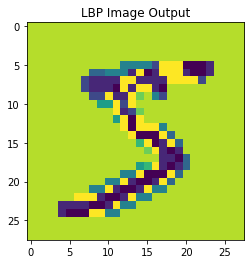

In [10]:
from skimage import feature
numPoints, radius=8, 3
lbp = feature.local_binary_pattern(X_train[0].reshape(28,28), numPoints,radius,method='uniform')
print('LBP extracted image shape:',lbp.shape)
plt.imshow(lbp)
plt.title('LBP Image Output');

Transfering all images and saving the features in X_train_lbp and X_test_lbp.

In [11]:
X_train_lbp=np.zeros(X_train.shape)
for i in range(len(X_train)):
    X_train_lbp[i] = feature.local_binary_pattern(X_train[i].reshape(28,28), numPoints,radius).reshape(-1,)
print('LBP Training shape:',X_train_lbp.shape)

LBP Training shape: (60000, 784)


In [12]:
X_test_lbp=np.zeros(X_test.shape)
for i in range(len(X_test)):
    X_test_lbp[i] = feature.local_binary_pattern(X_test[i].reshape(28,28), numPoints,radius).reshape(-1,)
print('LBP Testing shape:',X_test_lbp.shape)

LBP Testing shape: (10000, 784)


## Classification Method:

### 1. K-Nearest Neighbor  (KNN):

Its a supervised learning algorithm that classify the data by computing distance between points in dataset. It use number of nearest neighnours to classify the dataset.

#### Testing on different Parameters:

We are trying to find the best parameters by testing the knn on different number of n_neighbors, and different dataset like 'Raw pixels','HOG','LBP'. We are only training it on small dataset of random 5000 images and testing it on 1000 images.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
training_dataset=[X_train,X_train_hog,X_train_lbp]
testing_dataset=[X_test,X_test_hog,X_test_lbp]
Dataset_names=['Raw pixels','HOG','LBP']

np.random.seed(14)
Random_numbers_train=np.random.randint(0,60000,5000)
Random_numbers_test=np.random.randint(0,10000,1000)

for g in range(len(Dataset_names)):
    for k_n in range(1, 11):
        starting_time=time.time()
        model = KNeighborsClassifier(n_neighbors=k_n)
        model.fit(training_dataset[g][Random_numbers_train], y_train[Random_numbers_train])
        score = model.score(testing_dataset[g][Random_numbers_test], y_test[Random_numbers_test])
        print('Method:',Dataset_names[g],'K:',k_n,'Score:', score * 100,'Time:',time.time()-starting_time)

Method: Raw pixels K: 1 Score: 92.80000000000001 Time: 6.01810884475708
Method: Raw pixels K: 2 Score: 90.9 Time: 6.0324060916900635
Method: Raw pixels K: 3 Score: 93.8 Time: 6.025223731994629
Method: Raw pixels K: 4 Score: 93.30000000000001 Time: 5.998216867446899
Method: Raw pixels K: 5 Score: 93.8 Time: 5.977747917175293
Method: Raw pixels K: 6 Score: 93.0 Time: 5.9520180225372314
Method: Raw pixels K: 7 Score: 92.80000000000001 Time: 5.966579914093018
Method: Raw pixels K: 8 Score: 92.4 Time: 5.968679428100586
Method: Raw pixels K: 9 Score: 92.7 Time: 5.999557971954346
Method: Raw pixels K: 10 Score: 92.4 Time: 5.970491409301758
Method: HOG K: 1 Score: 85.1 Time: 1.1219489574432373
Method: HOG K: 2 Score: 86.4 Time: 1.120365858078003
Method: HOG K: 3 Score: 85.8 Time: 1.118274211883545
Method: HOG K: 4 Score: 86.4 Time: 1.115206003189087
Method: HOG K: 5 Score: 86.7 Time: 1.123042345046997
Method: HOG K: 6 Score: 87.2 Time: 1.1180474758148193
Method: HOG K: 7 Score: 86.9 Time: 1.11

#### Best Parameters:

By observing the upper code, the maximum accuracy we have received with using Raw Pixels, and using 3 n_neighbors. 

In [16]:
# re-train our classifier using the best k value and predict the labels of the
# test data
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(model.score(X_test, y_test))

0.9705


#### Classification Score and Confusion Metric

In [17]:
from sklearn.metrics import classification_report
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [24]:
from sklearn.metrics import confusion_matrix
import pandas as pd
print ("Confusion matrix")
pd.DataFrame(confusion_matrix(y_test,predictions),columns=np.unique(y_test),index=np.unique(y_test))

Confusion matrix


,0,1,2,3,4,5,6,7,8,9
0,974,1,1,0,0,1,2,1,0,0
1,0,1133,2,0,0,0,0,0,0,0
2,10,9,996,2,0,0,0,13,2,0
3,0,2,4,976,1,13,1,7,3,3
4,1,6,0,0,950,0,4,2,0,19
5,6,1,0,11,2,859,5,1,3,4
6,5,3,0,0,3,3,944,0,0,0
7,0,21,5,0,1,0,0,991,0,10
8,8,2,4,16,8,11,3,4,914,4
9,4,5,2,8,9,2,1,8,2,968


#### Testing on Image

Predicted Number: 7


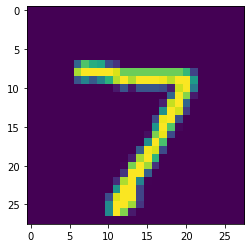

In [19]:
image_test=X_test[0]
prediction = model.predict([image_test])[0]
plt.imshow(image_test.reshape((28,28)))
print('Predicted Number:',prediction)

#### Final Results:

By using knn we have received these results on test data.
    
    Accuracy: 97.05%
    Precision: 0.97
    Recall: 0.99
    F1-score: 0.98

### 2. Support Vector Machines (SVM)

Support Vector Machine classify the dataset based on different hyperplane, its finds the best seperating plane that seperate different classes points. Its suitable for small to medium size dataset.

#### Testing on different Parameters:

We are trying to find the best parameters by testing the svm on different kernels, C, gamma, degree and different dataset like 'Raw pixels','HOG','LBP'. We are only training it on small dataset of random 5000 images and testing it on 1000 images.

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

np.random.seed(14)
Random_numbers_train=np.random.randint(0,60000,5000)
Random_numbers_test=np.random.randint(0,10000,1000)

training_dataset=[X_train,X_train_hog,X_train_lbp]
testing_dataset=[X_test,X_test_hog,X_test_lbp]
Dataset_names=['Raw pixels','HOG','LBP']

for i in range(3):
    for kernel in ['poly','sigmoid','rbf']:
        for C in [0.1,1,5]:
            for gamma in [1,0.1,0.01]:
                for degree in [1,2,3]:
                    clf = SVC(C=C,gamma=gamma,kernel=kernel,degree=degree)
                    clf.fit(training_dataset[i][Random_numbers_train], y_train[Random_numbers_train])
                    predicted_labels = clf.predict(testing_dataset[i][Random_numbers_test])
                    accuracy = accuracy_score(y_test[Random_numbers_test], predicted_labels) * 100
                    print('Method:',Dataset_names[i],'kernel:',kernel,'C:',C,'gamma:',gamma,'degree:',degree,'Accuracy:',accuracy)

Method: Raw pixels kernel: poly C: 0.1 gamma: 1 degree: 1 Accuracy: 90.4
Method: Raw pixels kernel: poly C: 0.1 gamma: 1 degree: 2 Accuracy: 93.60000000000001
Method: Raw pixels kernel: poly C: 0.1 gamma: 1 degree: 3 Accuracy: 92.60000000000001
Method: Raw pixels kernel: poly C: 0.1 gamma: 0.1 degree: 1 Accuracy: 90.4
Method: Raw pixels kernel: poly C: 0.1 gamma: 0.1 degree: 2 Accuracy: 93.60000000000001
Method: Raw pixels kernel: poly C: 0.1 gamma: 0.1 degree: 3 Accuracy: 92.60000000000001
Method: Raw pixels kernel: poly C: 0.1 gamma: 0.01 degree: 1 Accuracy: 90.4
Method: Raw pixels kernel: poly C: 0.1 gamma: 0.01 degree: 2 Accuracy: 93.60000000000001
Method: Raw pixels kernel: poly C: 0.1 gamma: 0.01 degree: 3 Accuracy: 92.60000000000001
Method: Raw pixels kernel: poly C: 1 gamma: 1 degree: 1 Accuracy: 90.4
Method: Raw pixels kernel: poly C: 1 gamma: 1 degree: 2 Accuracy: 93.60000000000001
Method: Raw pixels kernel: poly C: 1 gamma: 1 degree: 3 Accuracy: 92.60000000000001
Method: Raw

Method: HOG kernel: sigmoid C: 0.1 gamma: 1 degree: 2 Accuracy: 14.099999999999998
Method: HOG kernel: sigmoid C: 0.1 gamma: 1 degree: 3 Accuracy: 14.099999999999998
Method: HOG kernel: sigmoid C: 0.1 gamma: 0.1 degree: 1 Accuracy: 90.8
Method: HOG kernel: sigmoid C: 0.1 gamma: 0.1 degree: 2 Accuracy: 90.8
Method: HOG kernel: sigmoid C: 0.1 gamma: 0.1 degree: 3 Accuracy: 90.8
Method: HOG kernel: sigmoid C: 0.1 gamma: 0.01 degree: 1 Accuracy: 56.89999999999999
Method: HOG kernel: sigmoid C: 0.1 gamma: 0.01 degree: 2 Accuracy: 56.89999999999999
Method: HOG kernel: sigmoid C: 0.1 gamma: 0.01 degree: 3 Accuracy: 56.89999999999999
Method: HOG kernel: sigmoid C: 1 gamma: 1 degree: 1 Accuracy: 26.0
Method: HOG kernel: sigmoid C: 1 gamma: 1 degree: 2 Accuracy: 26.0
Method: HOG kernel: sigmoid C: 1 gamma: 1 degree: 3 Accuracy: 26.0
Method: HOG kernel: sigmoid C: 1 gamma: 0.1 degree: 1 Accuracy: 91.4
Method: HOG kernel: sigmoid C: 1 gamma: 0.1 degree: 2 Accuracy: 91.4
Method: HOG kernel: sigmoid

Method: LBP kernel: rbf C: 1 gamma: 0.1 degree: 2 Accuracy: 10.8
Method: LBP kernel: rbf C: 1 gamma: 0.1 degree: 3 Accuracy: 10.8
Method: LBP kernel: rbf C: 1 gamma: 0.01 degree: 1 Accuracy: 10.8
Method: LBP kernel: rbf C: 1 gamma: 0.01 degree: 2 Accuracy: 10.8
Method: LBP kernel: rbf C: 1 gamma: 0.01 degree: 3 Accuracy: 10.8
Method: LBP kernel: rbf C: 5 gamma: 1 degree: 1 Accuracy: 10.8
Method: LBP kernel: rbf C: 5 gamma: 1 degree: 2 Accuracy: 10.8
Method: LBP kernel: rbf C: 5 gamma: 1 degree: 3 Accuracy: 10.8
Method: LBP kernel: rbf C: 5 gamma: 0.1 degree: 1 Accuracy: 10.8
Method: LBP kernel: rbf C: 5 gamma: 0.1 degree: 2 Accuracy: 10.8
Method: LBP kernel: rbf C: 5 gamma: 0.1 degree: 3 Accuracy: 10.8
Method: LBP kernel: rbf C: 5 gamma: 0.01 degree: 1 Accuracy: 10.8
Method: LBP kernel: rbf C: 5 gamma: 0.01 degree: 2 Accuracy: 10.8
Method: LBP kernel: rbf C: 5 gamma: 0.01 degree: 3 Accuracy: 10.8


#### Best Parameters:

By observing the upper results, the maximum accuracy we have received with using HOG features, rbf kernel, C=5 and gamma=0.1.

In [26]:
clf = SVC(C=5,gamma=0.1,kernel='rbf',degree=2)
clf.fit(X_train_hog, y_train)
predicted_labels = clf.predict(X_test_hog)
accuracy = accuracy_score(y_test, predicted_labels) * 100
accuracy

#### Classification Score and Confusion Metric

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.97      0.97       892
           6       0.98      0.97      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [29]:
from sklearn.metrics import confusion_matrix
import pandas as pd
print ("Confusion matrix")
pd.DataFrame(confusion_matrix(y_test,predicted_labels),columns=np.unique(y_test),index=np.unique(y_test))

Confusion matrix


,0,1,2,3,4,5,6,7,8,9
0,966,2,1,1,0,3,3,2,2,0
1,0,1123,1,2,0,0,6,0,3,0
2,2,2,1010,8,1,0,0,4,4,1
3,1,1,2,980,0,9,0,2,11,4
4,0,2,2,0,961,0,0,2,1,14
5,1,0,1,11,0,868,4,0,6,1
6,5,3,2,0,4,5,934,0,5,0
7,0,1,13,2,6,0,0,986,3,17
8,4,4,4,7,3,8,6,2,931,5
9,1,3,2,6,9,4,0,17,8,959


#### Testing on Image

Predicted Number: 7


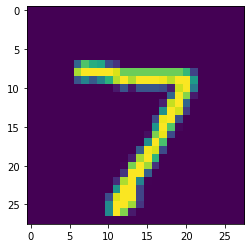

In [53]:
image_test = hog(X_test[0].reshape(28,28), orientations=9, pixels_per_cell=(7,7),cells_per_block=(1,1),visualize=False)
prediction = clf.predict([image_test])[0]
plt.imshow(X_test[0].reshape((28,28)))
print('Predicted Number:',prediction)

#### Final Results:

By using svm we have received these results on test data.
    
    Accuracy: 97.18%
    Precision: 0.99
    Recall: 0.99
    F1-score: 0.99

### 3. Neural Network

Neural Network is inter connected layers of neurons, it produce non linearity on the dataset. It takes inputs then processed by a neuron by applying weights on the input using an activation function to produce an output.

#### Testing on different Parameters:

We are trying to find the best parameters by testing the nn on different models architecture and different dataset like 'Raw pixels','HOG','LBP'. We are only training it on small dataset of random 5000 images and testing it on 1000 images.

We have created 3 Neural network models those Parameters are shown below:

Model1:

    Hidden Layer: 0
    Neurons in layers:input_data_length, Number_of_classes
Model2:

    Hidden Layer: 1
    Neurons in layers:input_data_length, 196, Number_of_classes

Model3:

    Hidden Layer: 2
    Neurons in layers:input_data_length, 392, 196, Number_of_classes
We have also use dropout in the hidden layers.

In [117]:
def forward_propogation(X_train,parameters,L):
    # performing forward propogation of neuron
    save_forward_w = {}
    A = X_train.T
    for l_number in range(L - 1): # except last layer we applied sigmoid activation
        Z = parameters["W" + str(l_number + 1)].dot(A) + parameters["b" + str(l_number + 1)]
        A = 1 / (1 + np.exp(-Z)) # except last layer we applied sigmoid activation
        
        save_forward_w["A" + str(l_number + 1)] = A
        save_forward_w["W" + str(l_number + 1)] = parameters["W" + str(l_number + 1)]
        save_forward_w["Z" + str(l_number + 1)] = Z

    Z = parameters["W" + str(L)].dot(A) + parameters["b" + str(L)]
    #in the last layer we applied softmax activation.
    expZ = np.exp(Z - np.max(Z))
    A = expZ / expZ.sum(axis=0, keepdims=True)
    save_forward_w["A" + str(L)] = A
    save_forward_w["W" + str(L)] = parameters["W" + str(L)]
    save_forward_w["Z" + str(L)] = Z
    #we return the weights so it can be used in backward propogation
    return A, save_forward_w
def backward_propogation(X_train, Y, save_forward_w,L,n):
    wights_derivative = {}
    save_forward_w["A0"] = X_train.T
    A = save_forward_w["A" + str(L)]
    dZ = A - Y.T #cross entropy loss derivative
    dW = dZ.dot(save_forward_w["A" + str(L - 1)].T) / n #Last layer weight backpropogation
    db = np.sum(dZ, axis=1, keepdims=True) / n ##Last layer bias backpropogation
    dAPrev = save_forward_w["W" + str(L)].T.dot(dZ)
    wights_derivative["dW" + str(L)] = dW
    wights_derivative["db" + str(L)] = db
    for l in range(L - 1, 0, -1):
        #backward propogation derivative for each layer. from the 2nd to first.
        s = 1 / (1 + np.exp(-save_forward_w["Z" + str(l)]))
        dZ = dAPrev * s * (1 - s) #sigmoid derivative
        dW = 1. / n * dZ.dot(save_forward_w["A" + str(l - 1)].T)
        db = 1. / n * np.sum(dZ, axis=1, keepdims=True)
        if l > 1:
            dAPrev = save_forward_w["W" + str(l)].T.dot(dZ)

        wights_derivative["dW" + str(l)] = dW
        wights_derivative["db" + str(l)] = db

    return wights_derivative

def Model_initilization_training(X_train,y_train,layers_size,learning_rate=0.01,n_iterations=500,loss_print=False):
    np.random.seed(1)
    parameters = {}
    L = len(layers_size)
    n = 0
    count=0
    Losss = []
    n = X_train.shape[0]
    layers_size.insert(0, X_train.shape[1])
    #weigths initialization using random numbers like xaiver
    for l in range(1, len(layers_size)):
        parameters["W" + str(l)] = np.random.randn(layers_size[l], layers_size[l - 1]) / np.sqrt(layers_size[l - 1])
        parameters["b" + str(l)] = np.zeros((layers_size[l], 1))
    for loop in range(n_iterations):
        #forward propogation at each iteration
        A, save_forward_w = forward_propogation(X_train,parameters,L)
        Loss = -np.mean(y_train * np.log(A.T+ 1e-8)) #Cross-Entropy Loss, we are adding small number 1e-8 to avoid zero division nan problem.
        wights_derivative = backward_propogation(X_train, y_train, save_forward_w,L,n)
        for l in range(1, L + 1):# weight updating by factor of learning rate
            parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate * wights_derivative["dW" + str(l)]
            parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate * wights_derivative["db" + str(l)]
        if loss_print:# loss printing at training time
            if loop % 10 == 0:
                A, cache = forward_propogation(X_train,parameters,L)
                y_predicted = np.argmax(A, axis=0)
                accuracy = (y_predicted == np.argmax(y_train, axis=1)).mean()

                print('Iterations:',loop,'Learning Rate :',learning_rate,"Training Loss: ", Loss, "Training Accuracy:",accuracy)
                
        Losss.append(Loss)
        if loop>100:
            if np.max(Losss[-20:])-np.min(Losss[-20:])<0.0001: #if loss only decrease 0.0001 in the last 20 iterations then stop the training
                break
        if count>10:
            if np.max(Losss[-10:])-(Losss[-10:][0])>0:# if next 10 number loss greater than previous one then decrease learning rate. 
                learning_rate=learning_rate/3
                count=0
        count=count+1
    return Losss,parameters,L

In [113]:
Models=['Model1','Model2','Model3'] 
Models_layers_size=[[10],[196,10],[392,196,10]] #different layers and their neurons size
training_dataset=[X_train/255,X_train_hog/np.max(X_train_hog),X_train_lbp/np.max(X_train_lbp)] 
testing_dataset=[X_test/255,X_test_hog/np.max(X_test_hog),X_test_lbp/np.max(X_test_lbp)]
y_train_nn=np.eye(np.max(y_train) + 1)[y_train]
Dataset_names=['Raw pixels','HOG','LBP']

for i in range(len(training_dataset)):
    for m in range(len(Models)):
        Losss,parameters,L=Model_initilization_training(training_dataset[i],y_train_nn,Models_layers_size[m],
                                                        learning_rate=1,n_iterations=2000,loss_print=False)
        A, cache = forward_propogation(testing_dataset[i],parameters,L)#testing the model.
        y_predicted = np.argmax(A, axis=0)
        accuracy = (y_predicted == y_test).mean()
        print('Method: ',Dataset_names[i],'Model:',Models[m],'Accuracy:',(accuracy*100))

Method:  Raw pixels Model: Model1 Accuracy: 90.64
Method:  Raw pixels Model: Model2 Accuracy: 90.5
Method:  Raw pixels Model: Model3 Accuracy: 90.91
Method:  HOG Model: Model1 Accuracy: 90.17
Method:  HOG Model: Model2 Accuracy: 90.68
Method:  HOG Model: Model3 Accuracy: 90.83
Method:  LBP Model: Model1 Accuracy: 89.98
Method:  LBP Model: Model2 Accuracy: 89.68
Method:  LBP Model: Model3 Accuracy: 89.90


#### Best Parameters:

By observing the upper results, the maximum accuracy we have received with using Model3 and raw images pixels Dataset.

In [118]:
y_train_nn=np.eye(np.max(y_train) + 1)[y_train]
Losss,parameters,L=Model_initilization_training(X_train/255,y_train_nn,[392,196,10],
                                                learning_rate=1,n_iterations=5000,loss_print=True)

Iterations: 0 Learning Rate : 1 Training Loss:  0.23424571793909232 Training Accuracy: 0.11236666666666667
Iterations: 10 Learning Rate : 1 Training Loss:  0.22843516319441046 Training Accuracy: 0.11236666666666667
Iterations: 20 Learning Rate : 1 Training Loss:  0.22631642330730067 Training Accuracy: 0.1573
Iterations: 30 Learning Rate : 1 Training Loss:  0.22132841960954583 Training Accuracy: 0.31488333333333335
Iterations: 40 Learning Rate : 1 Training Loss:  0.20664023815696012 Training Accuracy: 0.48038333333333333
Iterations: 50 Learning Rate : 1 Training Loss:  0.17456944413602174 Training Accuracy: 0.5832166666666667
Iterations: 60 Learning Rate : 0.3333333333333333 Training Loss:  0.3966546444002974 Training Accuracy: 0.3863666666666667
Iterations: 70 Learning Rate : 0.3333333333333333 Training Loss:  0.20878903271415852 Training Accuracy: 0.53425
Iterations: 80 Learning Rate : 0.3333333333333333 Training Loss:  0.15275966785052636 Training Accuracy: 0.5509833333333334
Iterati

Iterations: 690 Learning Rate : 0.3333333333333333 Training Loss:  0.03529433269280478 Training Accuracy: 0.8988833333333334
Iterations: 700 Learning Rate : 0.3333333333333333 Training Loss:  0.035118289204414455 Training Accuracy: 0.8994333333333333
Iterations: 710 Learning Rate : 0.3333333333333333 Training Loss:  0.034946905449516855 Training Accuracy: 0.89995
Iterations: 720 Learning Rate : 0.3333333333333333 Training Loss:  0.03477995000396776 Training Accuracy: 0.9003
Iterations: 730 Learning Rate : 0.3333333333333333 Training Loss:  0.03461720693681539 Training Accuracy: 0.9006333333333333
Iterations: 740 Learning Rate : 0.3333333333333333 Training Loss:  0.034458474608481164 Training Accuracy: 0.9010833333333333
Iterations: 750 Learning Rate : 0.3333333333333333 Training Loss:  0.03430356456541612 Training Accuracy: 0.9015666666666666
Iterations: 760 Learning Rate : 0.3333333333333333 Training Loss:  0.03415230052367115 Training Accuracy: 0.90205
Iterations: 770 Learning Rate :

Iterations: 1370 Learning Rate : 0.3333333333333333 Training Loss:  0.028441492221486054 Training Accuracy: 0.9179333333333334
Iterations: 1380 Learning Rate : 0.3333333333333333 Training Loss:  0.028377822695582807 Training Accuracy: 0.9181333333333334
Iterations: 1390 Learning Rate : 0.3333333333333333 Training Loss:  0.028314653345482343 Training Accuracy: 0.9182666666666667
Iterations: 1400 Learning Rate : 0.3333333333333333 Training Loss:  0.02825197226169105 Training Accuracy: 0.9184666666666667
Iterations: 1410 Learning Rate : 0.3333333333333333 Training Loss:  0.028189767875035188 Training Accuracy: 0.9186
Iterations: 1420 Learning Rate : 0.3333333333333333 Training Loss:  0.028128028944249286 Training Accuracy: 0.9187666666666666
Iterations: 1430 Learning Rate : 0.3333333333333333 Training Loss:  0.028066744544056322 Training Accuracy: 0.91895
Iterations: 1440 Learning Rate : 0.3333333333333333 Training Loss:  0.028005904053722896 Training Accuracy: 0.9189833333333334
Iteratio

#### NN Training and Validation (Accuracy and Loss Comparison):

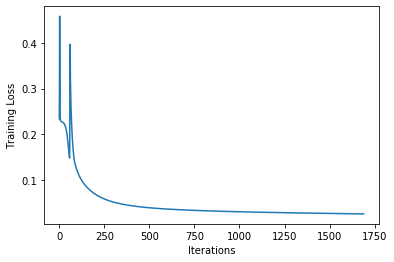

In [120]:
plt.figure()
plt.plot(np.arange(len(Losss)), Losss)
plt.xlabel("Iterations")
plt.ylabel("Training Loss")
plt.show()

In [140]:
A, cache = forward_propogation(X_test/255,parameters,L)#testing the model.
predicted_labels = np.argmax(A, axis=0)
accuracy = (predicted_labels == y_test).mean()
accuracy

0.9236

#### Classification Score and Confusion Metric

In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_labels))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.97      0.97      1135
           2       0.92      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.92      0.93      0.92       982
           5       0.90      0.86      0.88       892
           6       0.94      0.94      0.94       958
           7       0.94      0.92      0.93      1028
           8       0.89      0.89      0.89       974
           9       0.91      0.90      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [125]:
from sklearn.metrics import confusion_matrix
import pandas as pd
print ("Confusion matrix")
pd.DataFrame(confusion_matrix(y_test,predicted_labels),columns=np.unique(y_test),index=np.unique(y_test))

Confusion matrix


,0,1,2,3,4,5,6,7,8,9
0,963,0,3,1,0,4,6,1,2,0
1,0,1106,2,2,1,2,4,2,16,0
2,13,6,932,9,12,2,12,10,32,4
3,3,1,24,920,0,27,1,13,16,5
4,1,2,6,0,917,0,11,2,5,38
5,12,1,3,48,8,765,15,7,26,7
6,13,3,6,1,11,16,904,1,3,0
7,4,8,26,5,8,0,0,949,1,27
8,6,6,5,25,11,30,11,6,868,6
9,13,8,1,10,34,7,0,18,6,912


#### Testing on Image

Predicted Number: 3


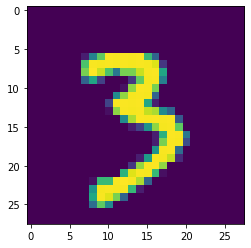

In [135]:
#testing the model.
Testing_image=X_test[30]
A, cache = forward_propogation((Testing_image/255).reshape(1,-1),parameters,L)
plt.imshow(Testing_image.reshape((28,28)))
print('Predicted Number:',np.argmax(A))

#### Final Results:

By using NN we have received these results on test data.
    
    Accuracy: 92.36%
    Precision: 0.92
    Recall: 0.92
    F1-score: 0.92

#### Wrong Classification Samples Visulization:

In [143]:
A, cache = forward_propogation(X_test/255,parameters,L)
predicted_labels=np.argmax(A,axis=0)
Wrong_classified_Examples=np.where(y_test!=predicted_labels)[0]
Wrong_classified_Examples

array([   8,   33,   62,   66,   92,  124,  149,  193,  195,  211,  217,
        233,  241,  245,  247,  259,  290,  300,  313,  320,  321,  340,
        341,  352,  362,  381,  412,  444,  445,  448,  449,  457,  478,
        479,  495,  502,  507,  511,  528,  531,  536,  543,  551,  565,
        569,  578,  582,  591,  610,  624,  629,  659,  684,  691,  707,
        714,  717,  720,  728,  740,  741,  760,  781,  791,  810,  839,
        844,  857,  881,  882,  898,  924,  938,  939,  947,  950,  956,
        959,  965,  982,  999, 1003, 1014, 1032, 1039, 1044, 1050, 1062,
       1068, 1082, 1101, 1107, 1112, 1114, 1119, 1173, 1181, 1182, 1191,
       1192, 1194, 1198, 1200, 1202, 1204, 1206, 1224, 1226, 1228, 1232,
       1234, 1242, 1247, 1248, 1251, 1256, 1260, 1283, 1289, 1291, 1299,
       1310, 1319, 1325, 1326, 1328, 1337, 1364, 1378, 1391, 1393, 1410,
       1413, 1429, 1433, 1440, 1444, 1453, 1465, 1467, 1494, 1500, 1514,
       1522, 1525, 1527, 1530, 1549, 1553, 1559, 15

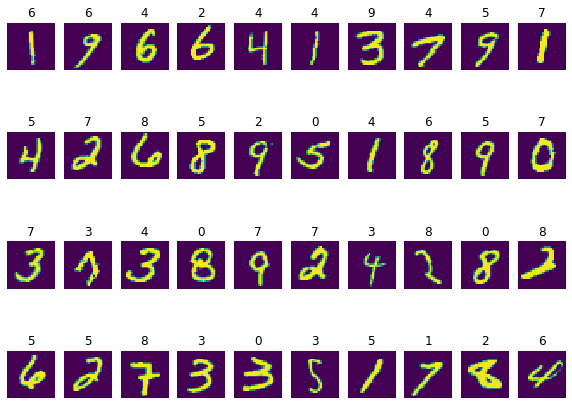

In [144]:
plt.figure(figsize=(10,80))
place_img=0
for i in Wrong_classified_Examples[:40]:
    plt.subplot(40,10,place_img+1)
    img1=X_train[i].reshape(28,28)
    plt.imshow(img1)
    plt.title(predicted_labels[i])
    plt.axis('off')
    place_img=place_img+1
plt.show()